In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
img_array=cv2.imread(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png")

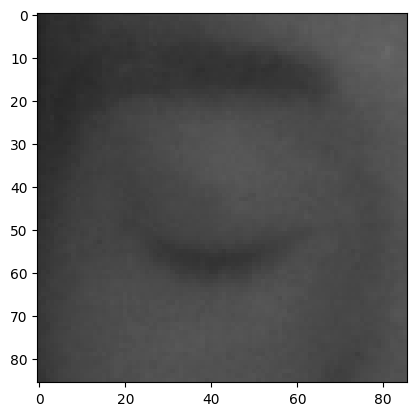

In [3]:
plt.imshow(img_array,cmap='gray')

In [4]:
img_array.shape

(86, 86, 3)

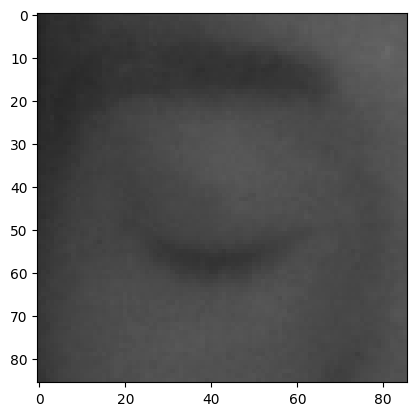

In [5]:
DataDirectory="C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/train"
classes=["Closed_Eyes","Open_Eyes"]
for category in classes:
  path=os.path.join(DataDirectory,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    backtorgh=cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
    plt.imshow(backtorgh)
    break
  break

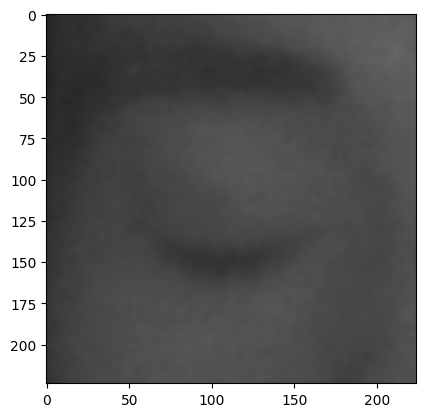

In [6]:
img_size=224
new_array=cv2.resize(backtorgh,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_Data=[]

def create_training_data():
  for category in classes:
    path=os.path.join(DataDirectory,category)
    class_num=classes.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgh=cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
        new_array=cv2.resize(backtorgh,(img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass

In [8]:
create_training_data()

In [9]:
print(len(training_Data))

4000


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X=[]
Y=[]

for features,label in training_Data:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,3)

In [12]:
X.shape

(4000, 224, 224, 3)

In [13]:
X=X/255.0

In [14]:
Y=np.array(Y)

In [15]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [16]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("Y.pickle","rb")
Y=pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [18]:
model=tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [19]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [20]:
base_input = model.input

In [21]:
base_output=model.layers[-4].output

In [25]:
from tensorflow.keras.layers import Flatten, Dense, Activation

flat_layer = Flatten()(base_output)  
final_output = Dense(1)(flat_layer)  
final_output = Activation('sigmoid')(final_output)  

In [31]:
new_model2=keras.Model(inputs=base_input,outputs=final_output)

In [35]:
for layer in model.layers:
    layers.trainable=False

In [32]:
new_model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [33]:
new_model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
# new_model2.fit(X,Y,epochs=1,validation_split=0.1)
new_model2.fit(X, Y, epochs=1, validation_split=0.1, batch_size=2)  


1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1119s 599ms/step - accuracy: 0.9423 - loss: 0.1584 - val_accuracy: 0.9975 - val_loss: 0.0057


In [36]:
new_model2.save("my_model.h5")

In [14]:
new_model2=tf.keras.models.load_model(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/my_model.h5")

In [39]:
img_array=cv2.imread(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/train/Open_Eyes/s0001_02338_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgh=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgh,(img_size,img_size))


In [40]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [41]:
X_input.shape

(1, 224, 224, 3)

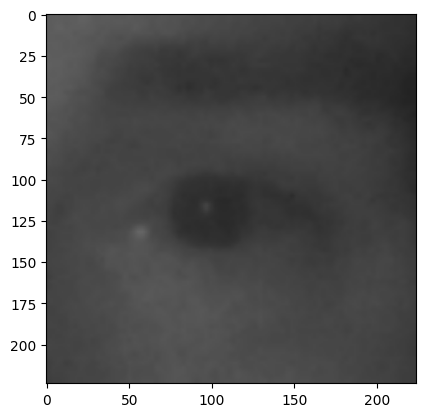

In [42]:
plt.imshow(new_array)

In [43]:
X_input=X_input/255.0

In [44]:
prediction=new_model2.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [45]:
prediction

array([[0.97746646]], dtype=float32)

In [22]:
img=cv2.imread(r"C:/Users/dinesh mishra/OneDrive/Pictures/Screenshots/Screenshot 2025-02-26 191613.png",cv2.IMREAD_COLOR)

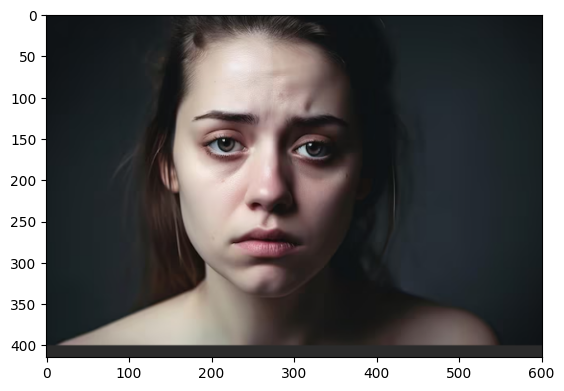

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [24]:
faceCascade=cv2.CascadeClassifier(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/haarcascade_frontalface_default.xml")

In [25]:
eyecascade=cv2.CascadeClassifier(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/haarcascade_eye.xml")

In [26]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [27]:
eyes=eyecascade.detectMultiScale(gray,1.1,4)

In [28]:
for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

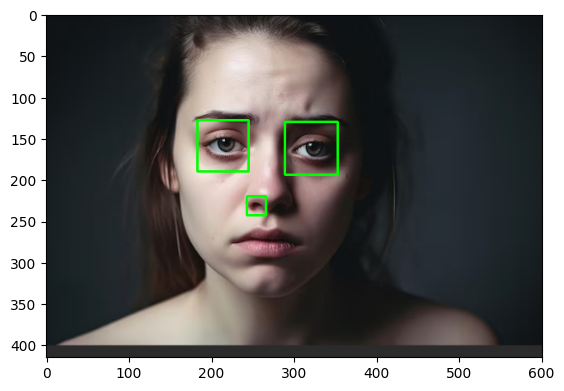

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [33]:
eyecascade=cv2.CascadeClassifier(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/haarcascade_eye_tree_eyeglasses.xml")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eyecascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    rol_gray=gray[y:y+h,x:x+w]
    rol_color=img[y:y+h,x:x+w]
    eyess=eyecascade.detectMultiScale(rol_gray)
    if len(eyess)==0:
        print("Eyes not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_rol=rol_color[ey:ey+eh,ex:ex+ew]

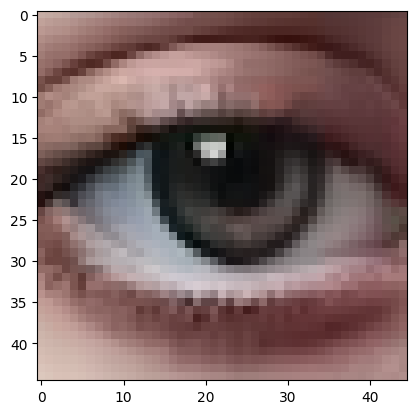

In [34]:
plt.imshow(cv2.cvtColor(eyes_rol,cv2.COLOR_BGR2RGB))

In [35]:
eyes_rol.shape

(45, 45, 3)

In [36]:
final_image=cv2.resize(eyes_rol,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [37]:
final_image.shape

(1, 224, 224, 3)

In [38]:
new_model2.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


array([[0.12941425]], dtype=float32)

# Real Time Live Video

#### First detect that Eyes are open are closed

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model  

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

try:
    new_model2 = load_model(r"C:/Users/dinesh mishra/OneDrive/Desktop/NewRepo/Drowsiness_Detection_model/my_model.h5") 
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

    status = "Eyes Not Detected"
    eyes_rol = None  
    for (x, y, w, h) in eyes:
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        eyes_rol = cv2.resize(roi_color, (224, 224))
        break  

    if eyes_rol is not None:
        final_image = np.expand_dims(eyes_rol, axis=0) / 255.0
        predictions = new_model2.predict(final_image)

        if predictions[0][0] >= 0.1:
            status = "Opened Eyes"
        else:
            status = "Closed Eyes"

    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(50, 50))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow("Drowsiness Detection Model", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9